# Основная задача проекта
Выявление основных факторов, влияющих на продажи игр по всему миру с помощью инструментов визуализации, предобработки данных и статистического анализа.


## Оглавление

* [Открываем файл и изучаем общую информацию](#Шаг_1)
* [Подготовка данных](#Шаг_2)
* [Анализ и описание данных](#Шаг_3)
* [Составляем портрет пользователя](#Шаг_4)
* [Проверка гипотез](#Шаг_5)
* [Общие выводы](#Шаг_6)

<a id = 'Шаг_1'> </a>
### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
games_data = pd.read_csv('/datasets/games.csv')
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Вывод 

Получили таблицу, содержащую информацию о различных играх: платформах, на которых они выходили, дате выхода, продажах, рейтинге и возрастной категории.
Необходимо обработать пропущенные значения, а так же поменять типы данных в столбцах с годом выпуска и рейтингом. 

<a id = 'Шаг_2' > </a>
### Шаг 2. Подготовка данных

Приведем названия столбцов к нижнему регистру.

In [4]:
# Функция map принимает 2 аргумента, функцию и аргумент составного типа данных, к которому она будет применена.
games_data.columns = map(str.lower, games_data.columns)
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перед тем, как изменять типы данных, обработаем пропуски.

Пропуски присутствуют в столбцах name, year_of_release, genre, critic_score, user_score и rating. Рассмотрим каждый из них отдельно.

In [7]:
# name
games_data[games_data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим пропуски в столбце name, так как количество пропусков незначительно

In [8]:
print('Пропуски до:', games_data['name'].isna().sum())
games_data = games_data[games_data['name'].isna() == False]
print('Пропуски после:', games_data['name'].isna().sum())

Пропуски до: 2
Пропуски после: 0


In [9]:
#year_of_release
games_data[games_data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков в столбце года выпуска всего 269, это около 1.5 процентов. Можно их безболезненно удалить.

In [10]:
print('Пропуски до:', games_data['year_of_release'].isna().sum())
games_data = games_data[games_data['year_of_release'].isna() == False]
print('Пропуски после:', games_data['year_of_release'].isna().sum())

Пропуски до: 269
Пропуски после: 0


Теперь приведем столбец years_of_release к типу int.

In [11]:
games_data['year_of_release'] = games_data['year_of_release'].astype(int)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [12]:
games_data[games_data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Поскольку пропусков слишком много и впоследствие необходимо провести статистические тесты, и заполнение пропусков может исказить результаты, оставим их нетронутыми. Возможной причиной части этих пропусков является малая популярность некоторых игр, так как критики обычно не оценивают непопулярные игры, а так же год выпуска, поскольку игровая индустрия относительно новая и объективные оценки начали появлятся ближе к концу нулевых.

Рассмотрим столбец user_score.

In [13]:
games_data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
1.1       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Видим значение tbd. Это аббревиатура, которая обозначает To Be Determined, то есть "Будет определено". Поскольку нам необходимо перевести этот столбец в численный тип для проведения дальнейших тестов, заменим tbd на значение None типа float.

In [14]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = None
games_data['user_score'] = games_data['user_score'].astype(float)

In [15]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Рассмотрим столбец rating

In [16]:
games_data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [17]:
games_data[games_data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Одна из причин появления пропусков скорее всего заключается в том, что компания ESRB, присваивающая рейтинги была образована только в 1994 году.

In [18]:
rating_query = games_data.query('year_of_release <= 1994')
rating_query['rating'].isna().sum()

481

Так же одной из возможных причин является то, что некоторым играм, рейтинги присуждались японской компанией CERO, а данные возможно загружались из базы ERSB, поэтому значения оказались упущены. Заполним их значением "Unknown", поскольку они не повлияют на анализ.

In [19]:
games_data['rating'] = games_data['rating'].fillna('unknown')

Посчитаем суммарные продажи и добавим в отдельный столбец.

In [20]:
games_data['full_sales'] = ( games_data['na_sales'] + games_data['eu_sales']
                        + games_data['jp_sales'] + games_data['other_sales']
                           )
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [21]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
full_sales         16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод

Избавились от пропусков, где это было возможно, а именно в столбцax name, year_of_release, genre и rating. 
В столбцах оценок заполнение пропусков может привести к искажениям в статистических тестах, поэтому их оставили. 
Так же были изменены типы данных для дальнейшего анализа и добавлен столбец суммы продаж. 

<a id = 'Шаг_3'> </a>
## Шаг 3. Проведем исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы.

In [22]:
games_by_year = games_data.groupby('year_of_release').agg({'name':'count'})
games_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим гистограмму распределения выпущенных игр по годам.

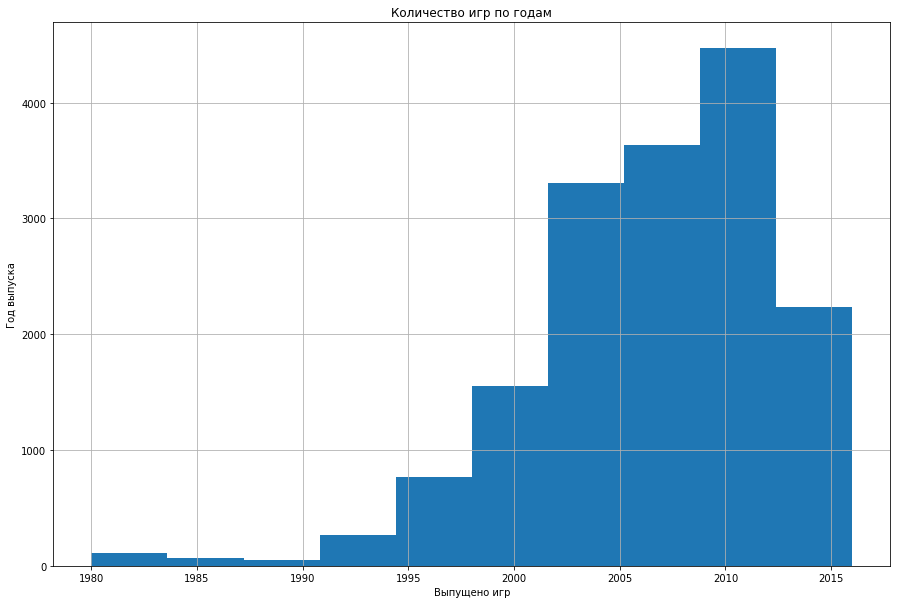

In [23]:
plt.title('Количество игр по годам')
hist_games = games_data['year_of_release'].hist(bins = 10, figsize = (15,10))
hist_games.set_xlabel('Выпущено игр')
hist_games.set_ylabel('Год выпуска')
plt.show()

Видим, что количество выпущенных игр растет вплоть до 2009 года и, начиная с 2012 года видим резкое падение.
Вероятно это связано с ростом популярности мобильных и онлайн игр.

Данные по выпущенным играм за период до 95 года очень незначительные, можно сказать, что они не важны.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [24]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


посмотрим на топ-10 платформ с самыми большими продажами.

In [25]:
pivot_platform = games_data.pivot_table(index = 'platform', values = 'full_sales', aggfunc = 'sum')
top_platforms = pivot_platform.sort_values(by = 'full_sales',ascending = False).head(5)
top_platforms

,full_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Построим распределение самых популярных платформ по годам.

для начала соберем список топ-10 платформ

In [26]:
top5_list = top_platforms.index.tolist()
top5_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

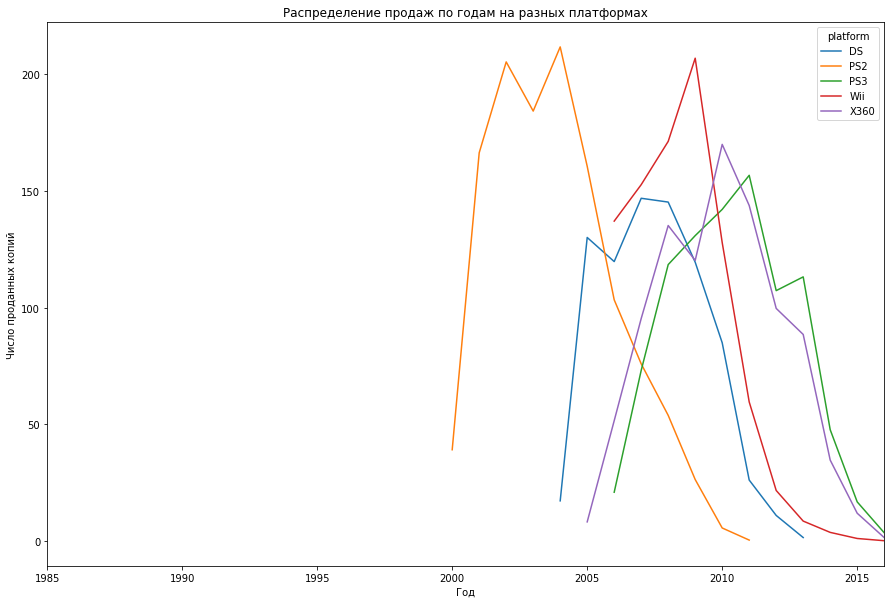

In [27]:
pivot_for_analysis = games_data.query('platform in @top5_list')
popular_platforms = pivot_for_analysis.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'full_sales', aggfunc = 'sum')
plot_for_analysis = popular_platforms.plot(figsize=(15,10))
#plot_for_analysis = sns.distplot(pivot_for_analysis, x = "year_of_release", hue="platform", kind="kde", fill=True)
plot_for_analysis.set_xlabel('Год')
plot_for_analysis.set_ylabel('Число проданных копий')
plt.title("Распределение продаж по годам на разных платформах")
plt.show()


In [28]:
popular_platforms.describe()

platform,DS,PS2,PS3,Wii,X360
count,11.000000,12.000000,11.000000,11.000000,12.000000
mean,72.980000,102.796667,84.667273,81.016364,80.103333
std,61.673155,79.405729,54.637565,79.136330,57.484408
min,0.020000,0.450000,3.600000,0.180000,1.520000
25%,14.140000,35.977500,34.360000,6.170000,29.045000
50%,85.020000,89.705000,107.360000,59.650000,91.995000
75%,124.975000,170.900000,124.725000,144.960000,124.032500
max,146.940000,211.810000,156.780000,206.970000,170.030000


Самые популярные платформы судя по графику имеют среднее время жизни около 8-10 лет, после чего продажи становятся незначительными.

Для определения актуального периода, необходимо выяснить, сколько в среднем платформа имеет хоть сколько-то значимые цифры по продажам.

In [29]:
# Определим минимальный уровень продаж в миллионах
minimum_sales = 1
report = games_data.query('full_sales > @minimum_sales')
report = report[report['year_of_release'] <= 2008]
report = report.groupby('platform').agg({'year_of_release':'nunique'})#.rename(columns = {'years_of_release':'lifetime'})
median_platform_lifetime = int(report.median()[0])
print("Медианное время жизни платформы cоставляет {} лет ".format(median_platform_lifetime))

Медианное время жизни платформы cоставляет 5 лет 


Определили медианное время жизни платформы качественно, по графику распределения продаж наблюдаем похожую картину.

Определим актуальный период, для этого вычтем из последнего года наблюдения медианное время жизни платформы.

In [30]:
actual_data = 2016 - median_platform_lifetime
print('Актуальный период: от {} до 2016 года'.format(actual_data))

Актуальный период: от 2011 до 2016 года


In [31]:
data_for_prediction = games_data.query('@actual_data <= year_of_release <= 2016')
data_for_prediction

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


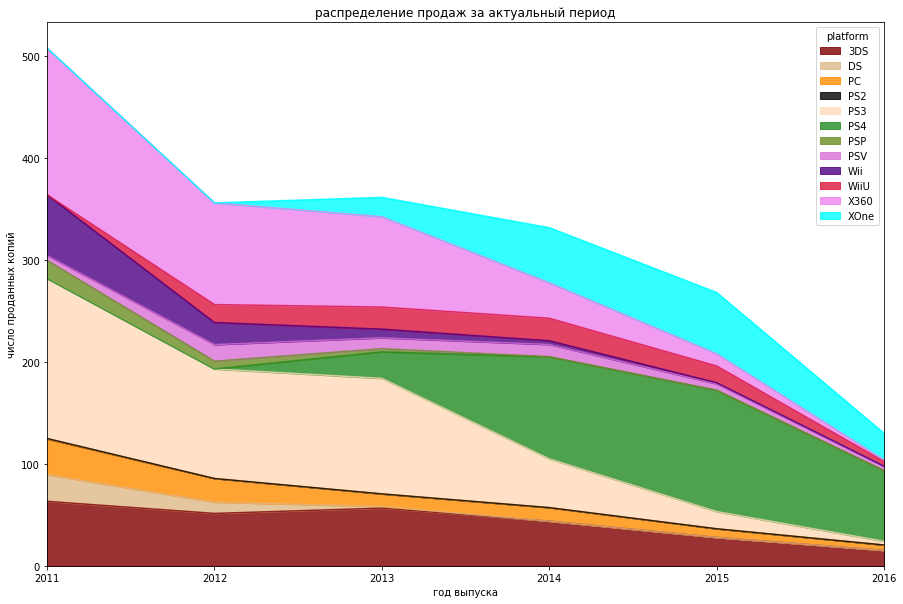

In [32]:
#построим график с накопления для лучшей визуализации
colors = ['maroon','burlywood','darkorange','black','peachpuff','forestgreen','olivedrab', 'orchid', 'indigo',
          'crimson', 'violet', 'cyan'
         ]
plot_of_prediction = data_for_prediction.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'full_sales', aggfunc = 'sum').plot.area(
    figsize = (15,10),color = colors, alpha = 0.8
                                                                                                    )
plot_of_prediction.set_xlabel('год выпуска')
plot_of_prediction.set_ylabel('число проданных копий')
plt.title('распределение продаж за актуальный период')
plt.show()

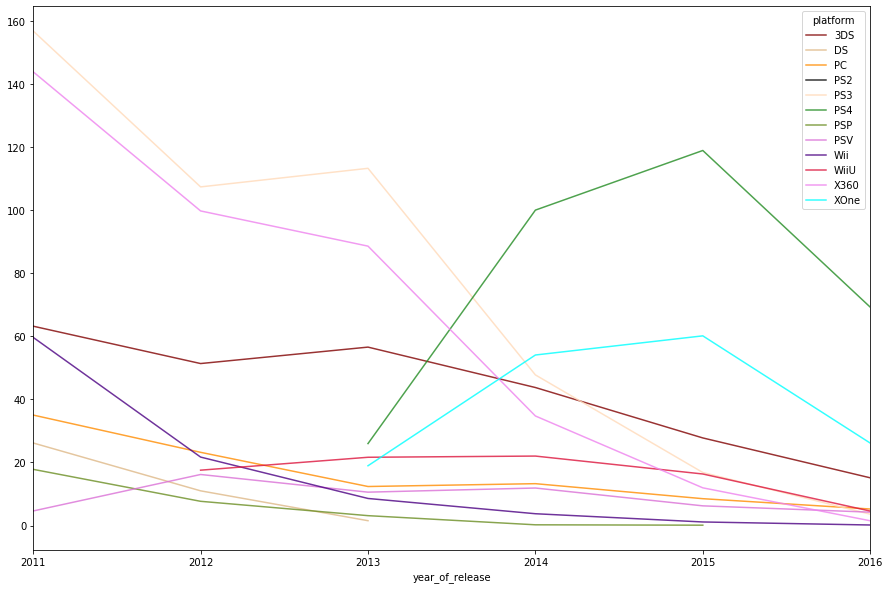

In [33]:
plot_of_prediction = data_for_prediction.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'full_sales', aggfunc = 'sum').plot(
    figsize = (15,10),color = colors, alpha = 0.8
                                                                                                    )

Из графика видим, что лидирует закономерно самые современные платформы ps4 и xbox one, однако к 2016 продажи падают, платформа становится менее актульной. Так же относительно большую популярность показывает платформа nintendo 3ds. Эти три платформы можно назвать потенциально прибыльными на 2017 год, поскольку к 2016 году продажи еще достаточно существенные.

Построим boxplot по продажам в зависимости от платформы.

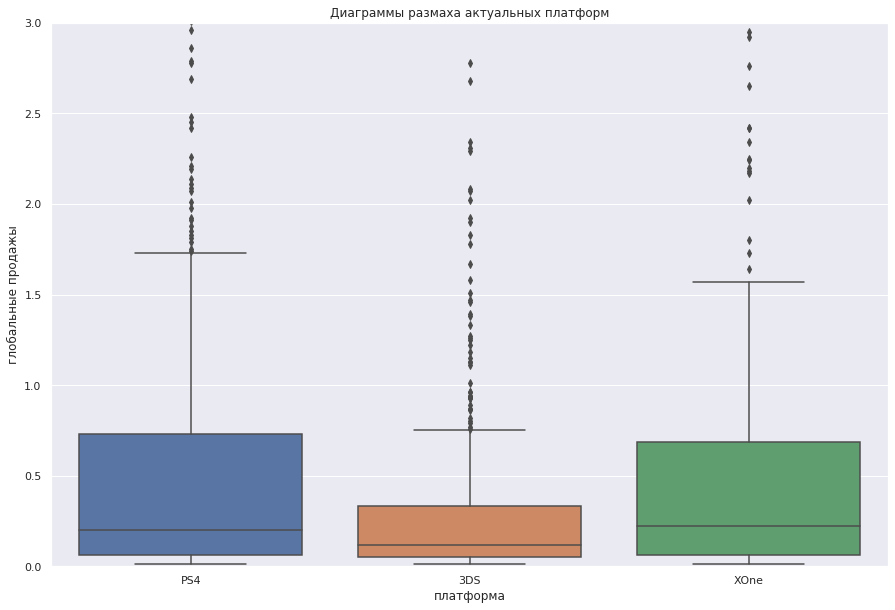

In [34]:
# Сделаем срез по актуальным платформам.
actual_platform = data_for_prediction.query('platform == "PS4" | platform == "XOne" | platform == "3DS"')
# Строим boxplot по полученному срезу
sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.boxplot(x = "platform", y = 'full_sales', data = actual_platform)
plt.ylim(0,3)
plt.title('Диаграммы размаха актуальных платформ')
ax.set_xlabel('платформа')
ax.set_ylabel('глобальные продажы')
plt.show()

Видим что продажи на платформах ps4 и XOne продажи сопоставимы, медианы находятся почти на одном уровне. При этом верхний квартиль у PS4 немного больше,чем у XOne. 3DS отстает по продажам. Однако все три платформы имеют большое количество выбросов, больше всего у 3DS, вероятно это означает, что в целом платформа не очень популярна, однако есть некоторые эксклюзивные игры, которые и выбиваются из общего распределения.

* Продажи игр на платформы ps4 и xone примерно одинаковы, скорее всего это связано с тем, что компании sony и microsoft обладают достаточными ресурсами и популярностью, чтобы вкладывать деньги в маркетинговые компании, исследования, создание новых продуктов, nintendo же в свою очередь такими ресурсами не обладает, поэтому и продажи проседают. Некоторые игры по договоренности с компаниями выходят только на их платформах и чаще всего этими компаниями становятся те, которые готовы предложить лучшие условия, в данном случае microsoft и sony

Создадим функцию расчета зависимости между отзывами и продажами для различных платформ, а так же построения диаграммы рассеяния

In [36]:
def correlation(platform):
    sales = data_for_prediction.query('platform == @platform')[['critic_score', 'user_score','full_sales']]
    print(sales.corr())
    pd.plotting.scatter_matrix(sales)
    plt.show()

              critic_score  user_score  full_sales
critic_score      1.000000    0.557654    0.406568
user_score        0.557654    1.000000   -0.031957
full_sales        0.406568   -0.031957    1.000000


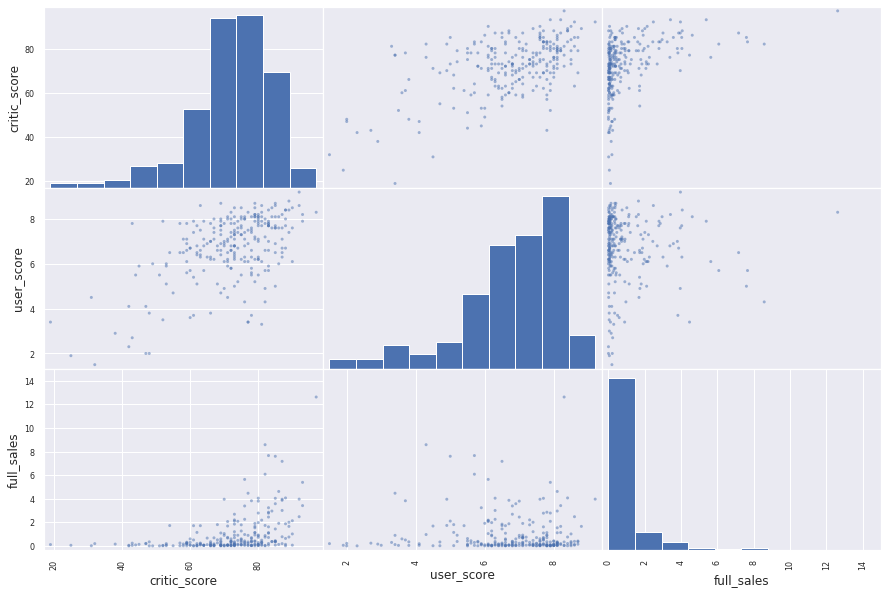

In [37]:
correlation('PS4')

              critic_score  user_score  full_sales
critic_score      1.000000    0.472462    0.416998
user_score        0.472462    1.000000   -0.068925
full_sales        0.416998   -0.068925    1.000000


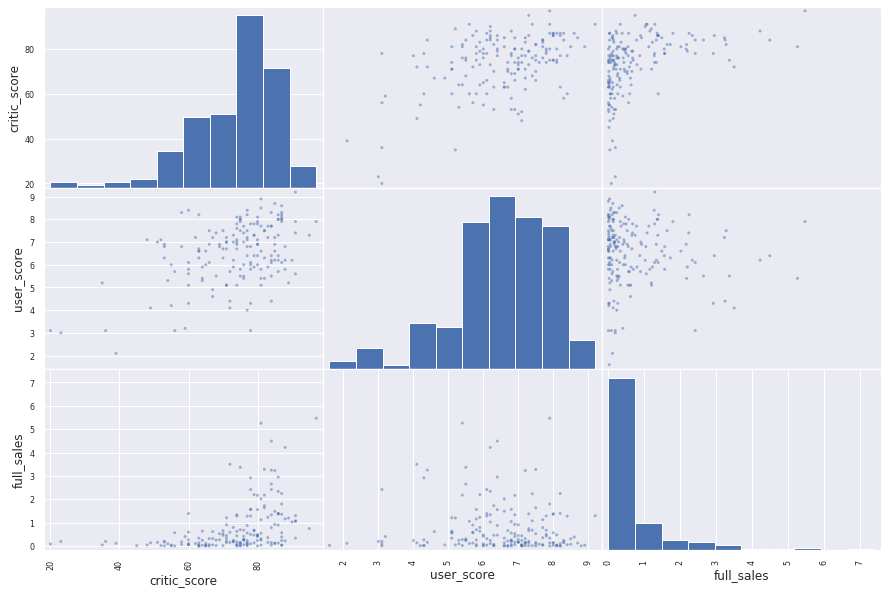

In [38]:
correlation('XOne')

              critic_score  user_score  full_sales
critic_score      1.000000    0.745222    0.348740
user_score        0.745222    1.000000    0.222078
full_sales        0.348740    0.222078    1.000000


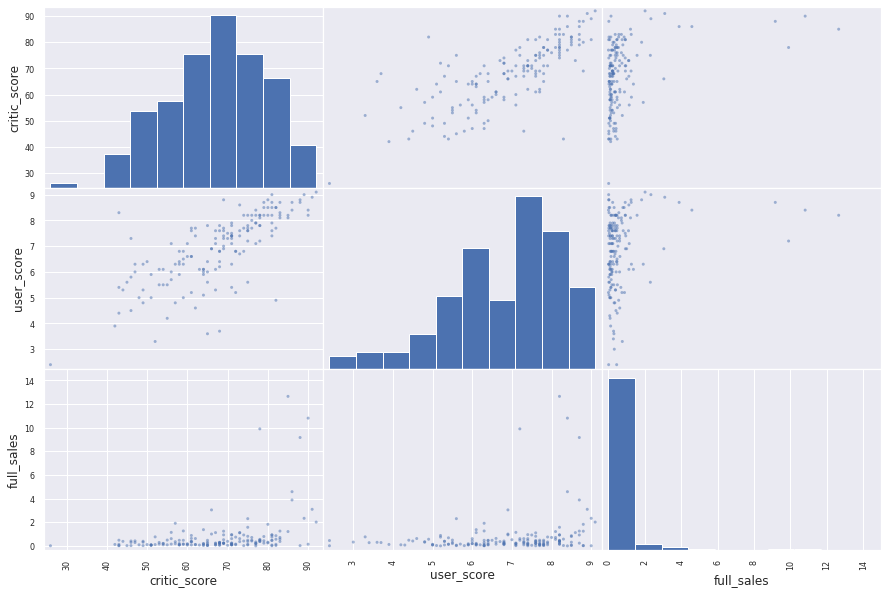

In [39]:
correlation('3DS')

Из посчитанного коэффициента корелляции и построенных диаграмм рассеяния видим, что продажи не сильно зависят от оценки критиков и не зависят от оценки пользователей. При этом, стоит отметить, что на графиках зависимости продаж от оценки критиков и пользователей, видно, что с увеличением оценки увеличивается и число выбросов продаж.
Возможно отсутствие зависимости связано с тем, что оценки пользователей и критиков часто могут быть не конструктивны.
Поэтому можно сказать, что на продажи влияет скорее фанатское сообщество, продвигающее данные игры и известное имя либо компании либо самой игры.

Посмотрим на общее распределение по жанрам.

In [40]:
genres = data_for_prediction.pivot_table(index = 'genre', values = 'full_sales').sort_values(by = 'full_sales', ascending = False).head()
genres

,full_sales
genre,
Shooter,1.224650
Platform,0.726885
Sports,0.609640
Role-Playing,0.528237
Racing,0.490611


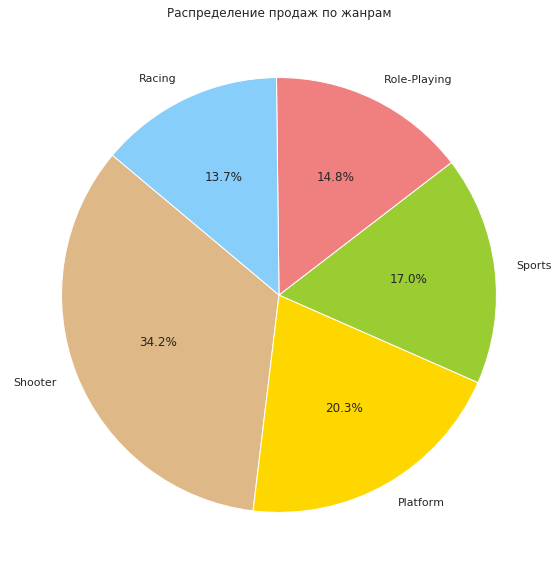

In [41]:
colors = ['burlywood','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
sizes = genres['full_sales']
plt.pie(sizes , labels = genres.index,colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Распределение продаж по жанрам')
plt.show()

In [42]:
df = data_for_prediction.copy()

Самый прибыльный жанр - шутер, вероятно, это связано с тем, что в таком жанре можно сразу же получить какие-то эмоции без сюжетной линиии. Так же шутеры достаточно популярны у киберспортсменов и различных стримеров, которые увеличивают популярность данного жанра. Так же бросается в глаза низкие продажи жанра adventure, вероятно, это связано с тем, что от такого рода игры обычно интересны очень узкому кругу потребителей из-за своей специфики и отсутствия в большинстве своем динамично развивающегося сюжета. Так же в жанре adventure редко бывают онлайн режимы.

### Вывод

Определили медианное время жизни платформы и актуальный период (2011 - 2016). Так же выявили самые популярные платформы - DS,	PS2, PS3, Wii, X360 за все время исследования. А так же нашли актуальные платформы, которые еще могут принести прибыль - ps4 и XOne.
Корелляция между отзывами и продажами отсутствует, тем не менее, с увеличением оценки критиков и пользователей, увеличивается и число выбросов (сверх успешных игр).
Так же выяснили, что самым популярным жанром является shooter, а самым невостребованным adventure.

<a id = 'Шаг_4' ></a>
## Шаг 4 составим портрет пользователей каждого региона

Определим самые популярные платформы (топ-5).

In [43]:
regions = ['na_sales','jp_sales', 'eu_sales']
top5_pl = df.pivot_table(index = 'platform',
                        values = regions,
                        aggfunc = 'sum')
for region in regions:
    sorted_platforms = top5_pl.sort_values(by = region, ascending = False).head().loc[:,region]
    top5_list = sorted_platforms.index.tolist()
report = df.query('platform in @top5_list').groupby('platform')[regions].sum()
report = report / report.sum()
report.T

platform,3DS,PC,PS3,PS4,X360
na_sales,0.134100,0.048481,0.273003,0.176431,0.367985
jp_sales,0.594259,0.000000,0.291696,0.094259,0.019785
eu_sales,0.113619,0.105144,0.302452,0.261636,0.217149


Построим графики.

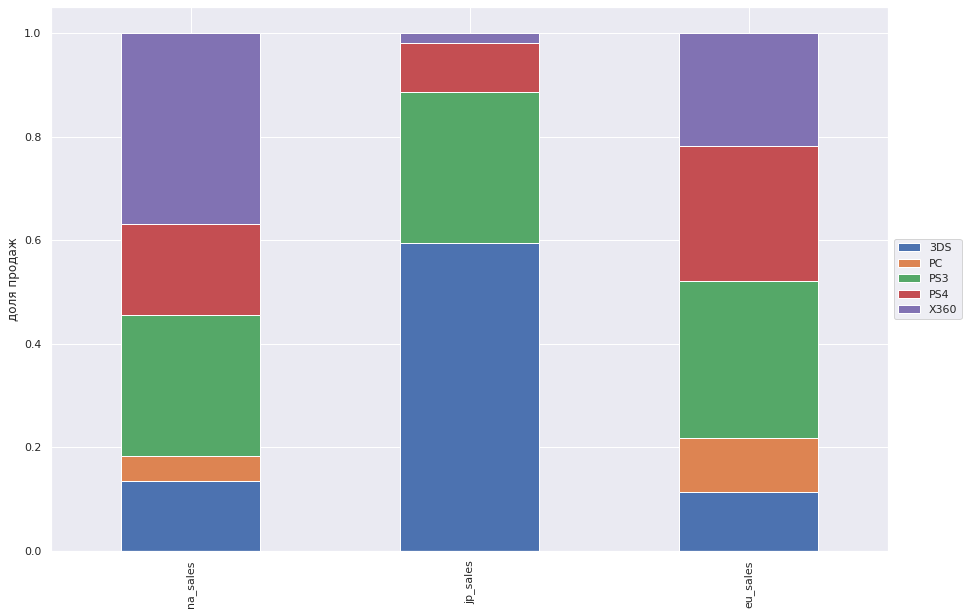

In [44]:
report.T.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('доля продаж')
plt.show()

Из таблицы и графиков видим, что в Северной Америке по продажам лидирует xbox 360, далее ps3. В японии ps3 с большим отрывом обгоняет всех конкурентов. В европе же продажи примерно на одном уровне. Стоит отметить, что ps4 во всех странах опережает XOne. Провал xbox в Японии объясняется судя по новостям из-за неудавшихся сделок и разных взглядов представителей компании и производителей игр. 

Определим самые популярные жанры

In [45]:
top5_genre = df.pivot_table(index = 'genre',
                        values = regions,
                        aggfunc = 'sum')
for region in regions:
    sorted_genres = top5_genre.sort_values(by = region, ascending = False).head().loc[:,region]
    top5_list = sorted_genres.index.tolist()
report_genre = df.query('genre in @top5_list').groupby('genre')[regions].sum()
report_genre = report_genre / report_genre.sum()
report_genre.T

genre,Action,Racing,Role-Playing,Shooter,Sports
na_sales,0.355365,0.049214,0.128930,0.299211,0.167280
jp_sales,0.369583,0.032764,0.463983,0.069246,0.064424
eu_sales,0.369768,0.075357,0.115692,0.274875,0.164308


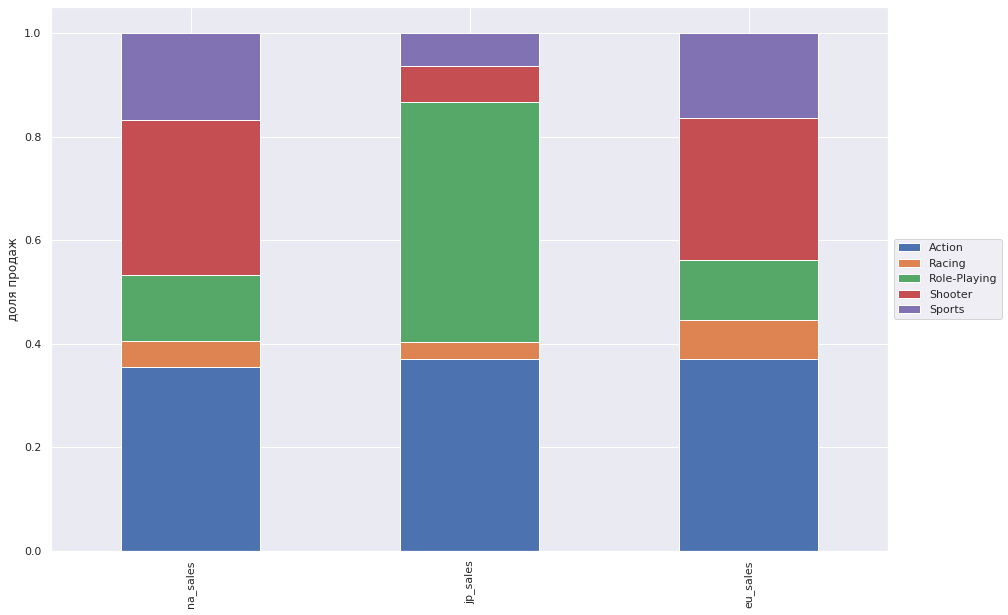

In [46]:
report_genre.T.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('доля продаж')
plt.show()

По графикам видим, что в Северной Америке и Европе самым популярным жанром является Action, на втором месте shooter. При этом в Японии shooter имеет низкие продажи, а role-playing имеет самые большие продажи. Вероятно это связано с особенностями японского общества, а так же игровой индустрии. При этом Action находится примерно на том же уровне, что и в Европе и Америке.

Влияние рейтинга ESRB на продажи.

In [47]:
esrb = df.pivot_table(index = 'rating',
                        values = regions,
                        aggfunc = 'sum')
for region in regions:
    top5_list = esrb.index.tolist()
report_esrb = df.groupby('rating')[regions].sum()
report_esrb = report_esrb / report_esrb.sum()
report_esrb.T

rating,E,E10+,EC,M,RP,T,unknown
na_sales,0.205083,0.141872,0.000506,0.371734,0.000000,0.131737,0.149067
jp_sales,0.149318,0.045715,0.000000,0.106412,0.000000,0.135925,0.562630
eu_sales,0.211604,0.116454,0.000000,0.373639,0.000045,0.124158,0.174099


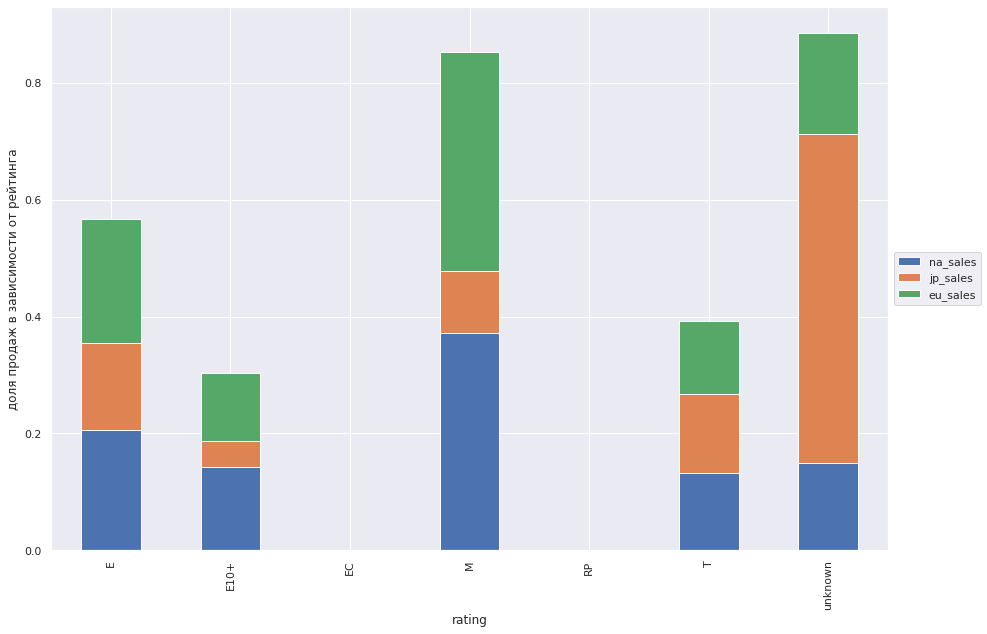

In [49]:
report_esrb.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('доля продаж в зависимости от рейтинга')
plt.show()

Доля продаж в Европе и Северной Америке примерно одинаково зависят от рейтинга, закономерно больше всего продаж приходится на взрослый сегмент, поскольку это основная целевая аудитория.При этом не можем определить зависимость для Японии, поскольку из-за собственной системы оценок, ESRB в основном не оценивает игры в Японии и видим характерную большую часть со значением unknown.

### Вывод

Типичный потребитель региона Северной Америки - это вероятно взрослый человек(поскольку рейтинг M - mature), который предпочитает приставку от Microsoft, игры в жанрах shooter и action.
Для Японии - это скорее приставки от sony и nintendo, по возрасту достаточной информации нет, поскольку рейтинги недоступны из-за другой системы оценивания, самый популярный жанр - role-playing.
Типичный европейский потребитель - это так же судя по графикам - взрослый человек, который предпочитает жанры action и shooter и чаще всего приобретает приставки от sony.

<a id = 'Шаг_5'> </a>
## Шаг 5 проверка гипотез

Рабочие гипотезы 
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотез используем критерий p-value

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox one и pc равны.

Сформулируем альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox one и pc отличаются.

In [50]:
from scipy import stats as st

Создадим выборки по рейтингу и платформам, исключив NaN.

In [51]:
xone_data = (data_for_prediction[(data_for_prediction['platform'] == "XOne") 
                                           & (data_for_prediction['user_score'].notna())]['user_score'])
pc_data = data_for_prediction[(data_for_prediction['platform'] == "PC") 
                                           & (data_for_prediction['user_score'].notna())]['user_score']   

Посмотрим на разницу дисперсий по выборкам.

In [52]:
print('разница дисперсий {:.1%}'.format((1 - np.var(xone_data)/np.var(pc_data))))

разница дисперсий 26.7%


Дисперсии отличаются более чем на 5%, поэтому передадим параметер equal_var = False, то есть воспользуемся Welsch-тестом.

In [53]:
results = st.ttest_ind(xone_data, pc_data, equal_var = False)
alpha = 0.05

In [54]:
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


### Вывод

С вероятностью в 98% различие в пользовательском рейтинге можно получить случайно. В ходе результатов полученных в тесте мы приходим к выводу, что получить схожесть рейтингов очень вероятно.

##### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу: средний пользовательский рейтинг жанров Action и Sports одинаковый

Сформулируем альтернативную гипотезу: средний пользовательский рейтинг жанров Action и Sports разный, т.е. средние значения выборок не равны.

Создадим выборки по рейтингу и жанрам, исключив NaN.

In [55]:
action_data = (data_for_prediction[(data_for_prediction['genre'] == "Action") 
                                           & (data_for_prediction['user_score'].notna())]['user_score'])
sports_data = (data_for_prediction[(data_for_prediction['genre'] == "Sports")
                                           & (data_for_prediction['user_score'].notna())]['user_score'])

Посмотрим на разницу дисперсий по выборкам.

In [56]:
print('разница дисперсий {:.1%}'.format((1 - np.var(action_data)/np.var(sports_data))))

разница дисперсий 37.0%


Дисперсии отличаются более чем на 5%, поэтому передадим параметер equal_var = False, то есть воспользуемся Welsch-тестом.

In [57]:
results = st.ttest_ind(action_data, sports_data, equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.285648549432565e-19
Отвергаем нулевую гипотезу


### Вывод

p-значение мало, что дает основания отвергнуть нулевую гипотезу и предположение об отсутствии различий между рейтингами жанров Aсtion и Sports. Различие рейтингов по жанрам неслучайно.

<a id ='Шаг_6' ></a> 
## Шаг 6 Общие выводы

В ходе проекта, были подготовлены данные, где возможно( name, year_of_release, genre и rating) - удалены пропуски, поменяны типы для последующего анализа.
Определили актуальный период для предсказания будущих продаж (6 лет), самые актуальные платформы на период 2010-2016 (wii, XOne, PS4), а так же жанры, которые пользуются самой большой популярностью (shooter)

Далее составили портрет покупателей из различных регионов. Результаты указывают на то, что на рынках Северной Америки и Европы потребители ведут себя похожим образом, их предпочтения (xbox и ps близкие продажи и action самый популярный жанр) имеют похожие значения по продажам. При этом покупатели из Японии ведут кардинально другим образом: xbox почти не представлен на рынке(это обусловлено сложным выходом на рынок компании), при этом самый популярный жанр с большим отрывом - это Role-Playing.
Так же одной из отличительных особенностей данных по Японии является наличие очень большого числа пропусков в возрастном рейтинге, это связано скорее всего с тем, что в Японии есть отдельная компания, занимающаяся их рынком и имеющая свои критерии и оценки, поэтому ESRB Японские игры оценивает только при выходе на европейский/американский рынки. Для Европы и Америки характерным является то, что самые продаваемые игры имеют рейтинг "взрослый"(M - mature)

Так же были проверены гипотезы о том, что:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

В результате первую и вторую гипотезы не удалось отвергнуть по результатам стат-теста. 
То есть с большой долей вероятности можно получить одинаковые рейтинги Xbox one и Pc, а так же разные рейтинги action и sports.

По результатм проделанной работы выявлены критерии успешности игры: Игра выпущена в течение последних 6 лет в Америке или Европе, жанра Action, возрастной категории Mature(Для взрослых), на платформу Xbox One либо Playstation 4.

Данный анализ можно применять для различных временных рамок, как для 1990-х годов, так и для 2020-х.

Компании стоит разумеется брать в расчет регион дистрибуции, поскольку в Японии следует сделать упор на role_playing игры для Playstation, так же рекламную кампанию следует проводить по жанру action во всех регионах. В Европе и Северной Америке следует делать упор на игры для всех(E) и для взрослых(M), на приставки xbox one и PS4, жанры action, shooter и возможно sports.